# **IDS575: Machine Learning and Statistical Methods**
## [Quiz #06 - Support Vector Machine]



## Import Libraries
* See various packages to be used.

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.datasets import load_svmlight_file
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.model_selection import train_test_split

In [2]:

X_train, y_train = load_svmlight_file("K:/MS MIS/Fall 2021/Machine Learning/Assignement/Programming Assignment/articles.train")
X_test, y_test = load_svmlight_file("K:/MS MIS/Fall 2021/Machine Learning/Assignement/Programming Assignment/articles.test")

type(X_train)
type(y_train)

numpy.ndarray


# Programming Assignment (PA)
* Create your own loadDataFile(filename) function.*
* The result must be a csr_matrix type whose entries must coincide with the result of load_svmlight_file().*

# Question a) load the data in csr matrix


In [8]:
def readCsrData(filename):
    num_of_features = []
    ys = []
    m=0
    
    with open(filename) as datafile:
        i=0
        column = []
        data = []
        row=[]
        for line in datafile:
            
            elements = line.split(' ')
            
            y, features = elements[0], elements[1:]
            
            ys.append(y)
            
            for f in features:
                temp = f.split(':')
                column.append(int(temp[0])-1)
                data.append(int(temp[1]))
                row.append(i)
            i=i+1
            m=m+1;
        
        col = np.array(column)
        data = np.array(data)
        row= np.array(row)
                     
        loadedCsrMatrix = csr_matrix((data, (row, col)), shape=(m,61189))
        return loadedCsrMatrix


### Below print shows the output of readCsrData method is same as the load_svmlight_file

In [9]:
my_sparse_matrix = readCsrData('K:/MS MIS/Fall 2021/Machine Learning/Assignement/Programming Assignment/articles.train')
print('My sparse matrix')
print(my_sparse_matrix)

print('Skit learn sparse matrix')
X_train, y_train = load_svmlight_file("K:/MS MIS/Fall 2021/Machine Learning/Assignement/Programming Assignment/articles.train")
print(X_train)

My sparse matrix
  (0, 10)	2
  (0, 11)	6
  (0, 12)	1
  (0, 22)	12
  (0, 24)	1
  (0, 26)	2
  (0, 27)	1
  (0, 28)	8
  (0, 29)	4
  (0, 32)	2
  (0, 37)	1
  (0, 47)	1
  (0, 48)	1
  (0, 59)	3
  (0, 80)	5
  (0, 99)	3
  (0, 103)	3
  (0, 121)	3
  (0, 124)	2
  (0, 140)	1
  (0, 142)	1
  (0, 143)	5
  (0, 228)	1
  (0, 234)	2
  (0, 238)	1
  :	:
  (3999, 8935)	1
  (3999, 9291)	1
  (3999, 11317)	1
  (3999, 11353)	2
  (3999, 13584)	1
  (3999, 15216)	1
  (3999, 22522)	1
  (3999, 23310)	1
  (3999, 27608)	1
  (3999, 31930)	1
  (3999, 33311)	1
  (3999, 37131)	1
  (3999, 41457)	1
  (3999, 44460)	1
  (3999, 45514)	4
  (3999, 46529)	1
  (3999, 46901)	1
  (3999, 46902)	1
  (3999, 49498)	3
  (3999, 50583)	1
  (3999, 51016)	2
  (3999, 51856)	1
  (3999, 51857)	2
  (3999, 51947)	1
  (3999, 51948)	1
Skit learn sparse matrix
  (0, 10)	2.0
  (0, 11)	6.0
  (0, 12)	1.0
  (0, 22)	12.0
  (0, 24)	1.0
  (0, 26)	2.0
  (0, 27)	1.0
  (0, 28)	8.0
  (0, 29)	4.0
  (0, 32)	2.0
  (0, 37)	1.0
  (0, 47)	1.0
  (0, 48)	1.0
  (0, 59)	3

# Question b) Train and test hard margin SVM

In [6]:
X_train = readCsrData("K:/MS MIS/Fall 2021/Machine Learning/Assignement/Programming Assignment/articles.train")
X_test = readCsrData("K:/MS MIS/Fall 2021/Machine Learning/Assignement/Programming Assignment/articles.test")


In [7]:
def renameY(y , c):
    for i in range(0,len(y)):
        if y[i]!=c:
            y[i]=-1
        else:
            y[i]=1
    return y

y_train_OS=renameY(y_train.copy(),1)
y_train_VH=renameY(y_train.copy(),2)
y_train_SP=renameY(y_train.copy(),3)
y_train_PO=renameY(y_train.copy(),4)


y_test_OS=renameY(y_test.copy(),1)
y_test_VH=renameY(y_test.copy(),2)
y_test_SP=renameY(y_test.copy(),3)
y_test_PO=renameY(y_test.copy(),4)

In [8]:
y_train_set=[y_train_OS,y_train_VH,y_train_SP,y_train_PO]
y_test_set=[y_test_OS,y_test_VH,y_test_SP,y_test_PO]

In [13]:
#define hard margin class
class HardSVM():

    def fit(self, X, y):
        model = svm.SVC(kernel='linear',C=1E10)
        model.fit(X, y)
        return model 

    def predict(self,model,X):
        return model.predict(X)
    

In [14]:
#this fuction will take a model, train it with X_train and y_train. Then will test with X_test and y_test and give accuracy
def predictAndAccu(model,X_train,X_test,y_train,y_test,com):
    my_model=model.fit(X_train,y_train)
    train_pred=my_model.predict(X_train)
    test_pred=my_model.predict(X_test)
    print(com," train Accuracy Score -> ",accuracy_score(train_pred, y_train)*100)
    print(com," test Accuracy Score -> ",accuracy_score(test_pred, y_test)*100)
    
    print(com," train confusion matrics")
    print(confusion_matrix(train_pred, y_train))
    print(com," test confusion matrics")
    print(confusion_matrix(test_pred, y_test))
    return my_model

In [15]:
#this fuction will take a model, train it with X_train and y_train for different c values. It returns the trained model
def predictAndAccuSoftHV(model,X_train,X_test,y_train,y_test,c):
    my_model=model.fit(X_train,y_train,c)
    train_pred=my_model.predict(X_train)
    test_pred=my_model.predict(X_test)
    return my_model

### Now we will make four different predictions for with four different classes

In [26]:
model_PO=predictAndAccu(HardSVM(),X_train,X_test,y_train_PO,y_test_PO,"PO")


PO  train Accuracy Score ->  100.0
PO  test Accuracy Score ->  94.08333333333333
PO  train confusion matrics
[[3000    0]
 [   0 1000]]
PO  test confusion matrics
[[1746   88]
 [  54  512]]


In [28]:
model_SP=predictAndAccu(HardSVM(),X_train,X_test,y_train_SP,y_test_SP,"SP")

SP  train Accuracy Score ->  100.0
SP  test Accuracy Score ->  94.91666666666667
SP  train confusion matrics
[[3000    0]
 [   0 1000]]
SP  test confusion matrics
[[1754   76]
 [  46  524]]


In [29]:
model_VH=predictAndAccu(HardSVM(),X_train,X_test,y_train_VH,y_test_VH,"VH")

VH  train Accuracy Score ->  100.0
VH  test Accuracy Score ->  93.41666666666667
VH  train confusion matrics
[[3000    0]
 [   0 1000]]
VH  test confusion matrics
[[1741   99]
 [  59  501]]


In [30]:
model_OS=predictAndAccu(HardSVM(),X_train,X_test,y_train_OS,y_test_OS,"OS")

OS  train Accuracy Score ->  100.0
OS  test Accuracy Score ->  95.79166666666666
OS  train confusion matrics
[[3000    0]
 [   0 1000]]
OS  test confusion matrics
[[1783   84]
 [  17  516]]


In [31]:
hard_models=[model_OS,model_VH,model_SP,model_PO]



In [16]:
#This function will take the models trained on four different classes and put it together to make best prediction
def multi_pred(X_test, y_test, models):
  
    multi_preds = np.array([])
    
    for y in range(len(y_test)):
        
        preds = [models[0].predict(X_test[y]), models[1].predict(X_test[y]), models[2].predict(X_test[y]), models[3].predict(X_test[y])]
        mx_index = preds.index(max(preds))
        
        if mx_index == 0:
            multi_pred = 1
        elif mx_index == 1:
            multi_pred = 2
        elif mx_index == 2:
            multi_pred = 3
        elif mx_index == 3:
            multi_pred = 4
                
        multi_preds = np.append(multi_preds, multi_pred)
    
    return multi_preds

### finding the accuracy of hard margin

In [59]:
multi_preds = multi_pred(X_test, y_test, hard_models)
print('Accuracy score for multiclass prediction on hard margin:', accuracy_score(y_test, multi_preds), '\n')
print(confusion_matrix(y_test,multi_preds))

Accuracy score for multiclass prediction on hard margin: 0.85875 

[[567  10  10  13]
 [ 80 501   9  10]
 [ 62  18 514   6]
 [ 72  28  21 479]]


## After training and testing hard margin classifier accuracy is 0.85875

# Question c) Performing hold out validation and finding best c

In [17]:
class softSVM():

    def fit(self, X, y,c):
        model = svm.SVC(kernel='linear',C=c)
        model.fit(X, y)
        return model 

    def predict(self,model,X):
        return model.predict(X)

In [18]:
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

y_train_v_OS=renameY(y_train_v.copy(),1)
y_train_v_VH=renameY(y_train_v.copy(),2)
y_train_v_SP=renameY(y_train_v.copy(),3)
y_train_v_PO=renameY(y_train_v.copy(),4)


y_test_v_OS=renameY(y_test_v.copy(),1)
y_test_v_VH=renameY(y_test_v.copy(),2)
y_test_v_SP=renameY(y_test_v.copy(),3)
y_test_v_PO=renameY(y_test_v.copy(),4)

In [19]:
C=[0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512]

In [50]:
allAccTrain={}
allAccTest={}
for c in C:
    model_OS=predictAndAccuSoftHV(softSVM(),X_train_v,X_test_v,y_train_v_OS,y_test_v_OS,c)
    model_VH=predictAndAccuSoftHV(softSVM(),X_train_v,X_test_v,y_train_v_VH,y_test_v_VH,c)
    model_SP=predictAndAccuSoftHV(softSVM(),X_train_v,X_test_v,y_train_v_SP,y_test_v_SP,c)
    model_PO=predictAndAccuSoftHV(softSVM(),X_train_v,X_test_v,y_train_v_PO,y_test_v_PO,c)
    holdout_models=[model_OS,model_VH,model_SP,model_PO]
    multi_preds_train = multi_pred(X_train_v, y_train_v, holdout_models)
    multi_preds_test = multi_pred(X_test_v, y_test_v, holdout_models)
    #Evaluation of multiclass prediction, using confusion matrix and accuracy
    print('Accuracy score on Test for multiclass prediction on soft margin for c=',c," is ", accuracy_score(y_test_v, multi_preds_test), '\n')
    print('Accuracy score on Train for multiclass prediction on soft margin for c=',c," is ", accuracy_score(y_train_v, multi_preds_train), '\n')
    
    #print(confusion_matrix(y_test,multi_preds))
    allAccTrain[c]=accuracy_score(y_train_v, multi_preds_train)
    allAccTest[c]=accuracy_score(y_test_v, multi_preds_test)
    
    

Accuracy score on Test for multiclass prediction on soft margin for c= 0.125  is  0.919 

Accuracy score on Train for multiclass prediction on soft margin for c= 0.125  is  0.9976666666666667 

Accuracy score on Test for multiclass prediction on soft margin for c= 0.25  is  0.921 

Accuracy score on Train for multiclass prediction on soft margin for c= 0.25  is  0.999 

Accuracy score on Test for multiclass prediction on soft margin for c= 0.5  is  0.92 

Accuracy score on Train for multiclass prediction on soft margin for c= 0.5  is  0.9996666666666667 

Accuracy score on Test for multiclass prediction on soft margin for c= 1  is  0.922 

Accuracy score on Train for multiclass prediction on soft margin for c= 1  is  1.0 

Accuracy score on Test for multiclass prediction on soft margin for c= 2  is  0.921 

Accuracy score on Train for multiclass prediction on soft margin for c= 2  is  1.0 

Accuracy score on Test for multiclass prediction on soft margin for c= 4  is  0.921 

Accuracy s

In [51]:
for key, value in allAccTrain.items():
    print(key, '->', value)

for key, value in allAccTest.items():
    print(key, '->', value)

0.125 -> 0.9976666666666667
0.25 -> 0.999
0.5 -> 0.9996666666666667
1 -> 1.0
2 -> 1.0
4 -> 1.0
8 -> 1.0
16 -> 1.0
32 -> 1.0
64 -> 1.0
128 -> 1.0
256 -> 1.0
512 -> 1.0
0.125 -> 0.919
0.25 -> 0.921
0.5 -> 0.92
1 -> 0.922
2 -> 0.921
4 -> 0.921
8 -> 0.921
16 -> 0.921
32 -> 0.921
64 -> 0.921
128 -> 0.921
256 -> 0.921
512 -> 0.921


In [52]:
for key, value in allAccTrain.items():
    allAccTrain[key]=1-value

for key, value in allAccTest.items():
    allAccTest[key]=1-value

print(allAccTrain)
print(allAccTest)

{0.125: 0.0023333333333332984, 0.25: 0.0010000000000000009, 0.5: 0.0003333333333332966, 1: 0.0, 2: 0.0, 4: 0.0, 8: 0.0, 16: 0.0, 32: 0.0, 64: 0.0, 128: 0.0, 256: 0.0, 512: 0.0}
{0.125: 0.08099999999999996, 0.25: 0.07899999999999996, 0.5: 0.07999999999999996, 1: 0.07799999999999996, 2: 0.07899999999999996, 4: 0.07899999999999996, 8: 0.07899999999999996, 16: 0.07899999999999996, 32: 0.07899999999999996, 64: 0.07899999999999996, 128: 0.07899999999999996, 256: 0.07899999999999996, 512: 0.07899999999999996}


In [54]:
accTrain=[]
cs=[]
for key, value in allAccTrain.items():
    accTrain.append(value)
    cs.append(key)

accTest=[]
for key, value in allAccTest.items():
    accTest.append(value)
    
print(accTrain)
print(accTest)
print(cs)

[0.0023333333333332984, 0.0010000000000000009, 0.0003333333333332966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.08099999999999996, 0.07899999999999996, 0.07999999999999996, 0.07799999999999996, 0.07899999999999996, 0.07899999999999996, 0.07899999999999996, 0.07899999999999996, 0.07899999999999996, 0.07899999999999996, 0.07899999999999996, 0.07899999999999996, 0.07899999999999996]
[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


### Plot for different log c values with training and testing error
### For soft margin classifier

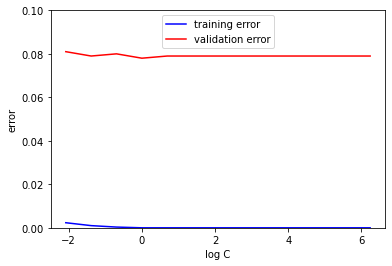

In [63]:
import matplotlib.pyplot as plt

plt.plot(np.log(np.array(cs)), accTrain, color='blue', label='training error')
plt.plot(np.log(np.array(cs)), accTest, color='red', label='validation error')
plt.legend(loc='upper center')
plt.ylim(0, 0.1)
plt.xlabel('log C')
plt.ylabel('error');

# Question d) : predicting with best c and checking accuracy

In [48]:
#above we found highest accuracy for c=1 be choose c=1
model_PO=predictAndAccuSoftHV(softSVM(),X_train,X_test,y_train_PO,y_test_PO,1)
model_SP=predictAndAccuSoftHV(softSVM(),X_train,X_test,y_train_SP,y_test_SP,1)
model_VH=predictAndAccuSoftHV(softSVM(),X_train,X_test,y_train_VH,y_test_VH,1)
model_OS=predictAndAccuSoftHV(softSVM(),X_train,X_test,y_train_OS,y_test_OS,1)

soft_models=[model_OS,model_VH,model_SP,model_PO]

multi_preds = multi_pred(X_test, y_test, soft_models)
#Evaluation of multiclass prediction, using confusion matrix and accuracy
print('Accuracy score for multiclass prediction for soft margin with c=1 on test data is', accuracy_score(y_test, multi_preds), '\n')
print(confusion_matrix(y_test,multi_preds))

Accuracy score for multiclass prediction for soft margin with c=1 on test data is 0.86375 

[[568   9  10  13]
 [ 80 502   9   9]
 [ 60  15 520   5]
 [ 74  25  18 483]]


 ### If we compare accuracy of hard margin 0.85875 to accuracy of soft margin 0.86375, then soft margin has better accuracy thus the better model

# Question e) normalization and finding c

In [20]:
from sklearn.preprocessing import normalize

normVXtrain = normalize(X_train_v, norm='l2')
normVXtest = normalize(X_test_v, norm='l2')

normXtrain = normalize(X_train, norm='l2')
normXtest = normalize(X_test, norm='l2')

allAccTrainNorm={}
allAccTestNorm={}
for c in C:
    model_OS=predictAndAccuSoftHV(softSVM(),normVXtrain,normVXtest,y_train_v_OS,y_test_v_OS,c)
    model_VH=predictAndAccuSoftHV(softSVM(),normVXtrain,normVXtest,y_train_v_VH,y_test_v_VH,c)
    model_SP=predictAndAccuSoftHV(softSVM(),normVXtrain,normVXtest,y_train_v_SP,y_test_v_SP,c)
    model_PO=predictAndAccuSoftHV(softSVM(),normVXtrain,normVXtest,y_train_v_PO,y_test_v_PO,c)
    holdout_models=[model_OS,model_VH,model_SP,model_PO]
    multi_preds_train = multi_pred(X_train_v, y_train_v, holdout_models)
    multi_preds_test = multi_pred(X_test_v, y_test_v, holdout_models)
    #Evaluation of multiclass prediction, using confusion matrix and accuracy
    print('Accuracy score on Test for multiclass prediction with normalisation for c=',c," is ", accuracy_score(y_test_v, multi_preds_test), '\n')
    print('Accuracy score on Train for multiclass prediction with normalisation for c=',c," is ", accuracy_score(y_train_v, multi_preds_train), '\n')
    
    #print(confusion_matrix(y_test,multi_preds))
    allAccTrainNorm[c]=accuracy_score(y_train_v, multi_preds_train)
    allAccTestNorm[c]=accuracy_score(y_test_v, multi_preds_test)

Accuracy score on Test for multiclass prediction with normalisation for c= 0.125  is  0.846 

Accuracy score on Train for multiclass prediction with normalisation for c= 0.125  is  0.8766666666666667 

Accuracy score on Test for multiclass prediction with normalisation for c= 0.25  is  0.839 

Accuracy score on Train for multiclass prediction with normalisation for c= 0.25  is  0.8886666666666667 

Accuracy score on Test for multiclass prediction with normalisation for c= 0.5  is  0.892 

Accuracy score on Train for multiclass prediction with normalisation for c= 0.5  is  0.947 

Accuracy score on Test for multiclass prediction with normalisation for c= 1  is  0.933 

Accuracy score on Train for multiclass prediction with normalisation for c= 1  is  0.9786666666666667 

Accuracy score on Test for multiclass prediction with normalisation for c= 2  is  0.947 

Accuracy score on Train for multiclass prediction with normalisation for c= 2  is  0.9933333333333333 

Accuracy score on Test fo

## After normalization ,c=2 and c=4 gives us highest accuracy on validation data

In [22]:
for key, value in allAccTrainNorm.items():
    allAccTrainNorm[key]=1-value

for key, value in allAccTestNorm.items():
    allAccTestNorm[key]=1-value

print(allAccTrainNorm)
print(allAccTestNorm)

{0.125: 0.1233333333333333, 0.25: 0.11133333333333328, 0.5: 0.05300000000000005, 1: 0.021333333333333315, 2: 0.00666666666666671, 4: 0.0013333333333332975, 8: 0.0, 16: 0.0, 32: 0.0, 64: 0.0, 128: 0.0, 256: 0.0, 512: 0.0}
{0.125: 0.15400000000000003, 0.25: 0.16100000000000003, 0.5: 0.10799999999999998, 1: 0.06699999999999995, 2: 0.05300000000000005, 4: 0.05300000000000005, 8: 0.05500000000000005, 16: 0.05600000000000005, 32: 0.05600000000000005, 64: 0.05600000000000005, 128: 0.05600000000000005, 256: 0.05600000000000005, 512: 0.05600000000000005}


In [23]:
accTrain=[]
cs=[]
for key, value in allAccTrainNorm.items():
    accTrain.append(value)
    cs.append(key)

accTest=[]
for key, value in allAccTestNorm.items():
    accTest.append(value)
    
print(accTrain)
print(accTest)
print(cs)

[0.1233333333333333, 0.11133333333333328, 0.05300000000000005, 0.021333333333333315, 0.00666666666666671, 0.0013333333333332975, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.15400000000000003, 0.16100000000000003, 0.10799999999999998, 0.06699999999999995, 0.05300000000000005, 0.05300000000000005, 0.05500000000000005, 0.05600000000000005, 0.05600000000000005, 0.05600000000000005, 0.05600000000000005, 0.05600000000000005, 0.05600000000000005]
[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


### here is the plot of log C with training and testing error after normalization

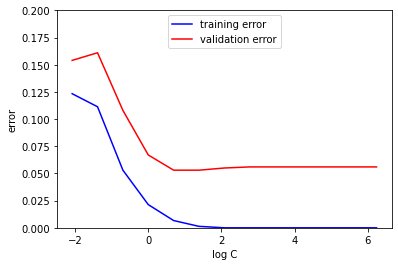

In [24]:
import matplotlib.pyplot as plt

plt.plot(np.log(np.array(cs)), accTrain, color='blue', label='training error')
plt.plot(np.log(np.array(cs)), accTest, color='red', label='validation error')
plt.legend(loc='upper center')
plt.ylim(0, 0.2)
plt.xlabel('log C')
plt.ylabel('error');

In [25]:
#above we found highest accuracy for c=2 after normalization we use c=2
model_PO=predictAndAccuSoftHV(softSVM(),normXtrain,normXtest,y_train_PO,y_test_PO,2)
model_SP=predictAndAccuSoftHV(softSVM(),normXtrain,normXtest,y_train_SP,y_test_SP,2)
model_VH=predictAndAccuSoftHV(softSVM(),normXtrain,normXtest,y_train_VH,y_test_VH,2)
model_OS=predictAndAccuSoftHV(softSVM(),normXtrain,normXtest,y_train_OS,y_test_OS,2)

soft_models=[model_OS,model_VH,model_SP,model_PO]

multi_preds = multi_pred(X_test, y_test, soft_models)

print('Accuracy score for multiclass prediction after normalization of X and with c=2 is', accuracy_score(y_test, multi_preds), '\n')
print(confusion_matrix(y_test,multi_preds))

Accuracy score for multiclass prediction after normalization of X and with c=2 is 0.9145833333333333 

[[568  13   4  15]
 [ 26 564   2   8]
 [ 20  42 531   7]
 [ 11  45  12 532]]


### We can see that after normalization and using newly found c the test accuracy is 0.91 which has improved a lot from normal soft margin (0.86) and hard margin (0.85)

### SVM tries to maximize the distance between the separating plane and the support vectors. If one feature (i.e. one dimension in this space) has very large values, it will dominate the other features when calculating the distance. If you rescale all features , they all have the same influence on the distance metric.

# Question f) One vs One

### using different c values and calculating test and train accuracy for one vs one

In [30]:
for c in C:
    model =  svm.SVC(kernel='linear', C=c, decision_function_shape='ovo')
    model.fit(normXtrain, y_train)
    train_score = model.score(normXtrain, y_train)
    test_score = model.score(normXtest, y_test)
    print("Training score for OVO with c=",c, " is ",train_score)
    print("Testing score for OVO with c=",c, " is ",test_score)
    

Training score for OVO with c= 0.125  is  0.89025
Testing score for OVO with c= 0.125  is  0.8458333333333333
Training score for OVO with c= 0.25  is  0.94
Testing score for OVO with c= 0.25  is  0.88375
Training score for OVO with c= 0.5  is  0.97275
Testing score for OVO with c= 0.5  is  0.90875
Training score for OVO with c= 1  is  0.989
Testing score for OVO with c= 1  is  0.9245833333333333
Training score for OVO with c= 2  is  0.9975
Testing score for OVO with c= 2  is  0.9308333333333333
Training score for OVO with c= 4  is  0.99925
Testing score for OVO with c= 4  is  0.9366666666666666
Training score for OVO with c= 8  is  1.0
Testing score for OVO with c= 8  is  0.9341666666666667
Training score for OVO with c= 16  is  1.0
Testing score for OVO with c= 16  is  0.9333333333333333
Training score for OVO with c= 32  is  1.0
Testing score for OVO with c= 32  is  0.9333333333333333
Training score for OVO with c= 64  is  1.0
Testing score for OVO with c= 64  is  0.9333333333333333


## we found c=4 has the best accuracy so retraining with c=4 and One vs One method

In [32]:
model =  svm.SVC(kernel='linear', C=4, decision_function_shape='ovo')
model.fit(normXtrain, y_train)
predictions=model.predict(normXtest)
print("Accuracy of OVO with best C model:",accuracy_score(predictions, y_test))

print("Confusion Matrics: ")
print(confusion_matrix(predictions, y_test))

Accuracy of OVO with best C model: 0.9366666666666666
Confusion Matrics: 
[[550  11   9   9]
 [ 14 562  10  11]
 [ 10   8 566  10]
 [ 26  19  15 570]]


## One vs One gives us the highest accuracy of 93.66 on testing data but it is computationally very expensive